In [20]:
%matplotlib inline

# libraries for imbalanced learning
from imblearn.under_sampling import RandomUnderSampler

import pandas as pd
import numpy as np
from utility_functions import report

# sklearn modules
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

import plotly.express as px
import matplotlib.pyplot as plt

from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

# Echonest audio features - IMBALANCED LEARNING
## 1. Premise
The hyper-parameters and results for unbalanced classifiers are taken  from the notebooks:
- bin-genre_decision-tree_KNN  (section 2.1)
- multi-genre_decision-tree-KNN   (section 2.2)
- popularity_decision-tree_KNN    (section 2.3)
Below we report their score and AUC curve for comparing them with the balanced data.

We use PCA to project the dimension of the dataset using only the first 2 principal components.

__________________________________
# 2.1 Binary genre - ROCK & JAZZ
__________________________________
## a) Import dataset

In [12]:
binclass_dataset = pd.read_csv('/Users/gaetanoantonicchio/Documents/GitHub/DataMining-2/datasets & labels [cleaned]/echo_genres.csv')
binclass_dataset.set_index('track_id', inplace=True)
binclass_dataset = binclass_dataset[binclass_dataset['genre_top'].isin(['Rock','Jazz'])]
binclass_dataset.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
track_id,,,,,,,,,
144,0.909011,0.443643,0.641997,0.924092,0.267669,0.089659,128.537,0.788251,Jazz
145,0.235506,0.438672,0.487752,0.716122,0.070359,0.047298,120.790,0.650452,Jazz
146,0.532019,0.417681,0.476422,0.402500,0.172105,0.035361,135.468,0.682397,Jazz
147,0.778410,0.706681,0.866116,0.806703,0.104650,0.065083,120.218,0.917613,Jazz
153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,Rock


In [13]:
print('Class distribution before balancing')
pd.concat(
    [binclass_dataset.genre_top.value_counts(),
                round(binclass_dataset.genre_top.value_counts(normalize=True).mul(100),2)],
                axis=1,
                keys=('counts','percentage (%)')
)

Class distribution before balancing


,counts,percentage (%)
Rock,3892,94.17
Jazz,241,5.83


In [14]:
# Data preprocessing
le = preprocessing.LabelEncoder()
binclass_dataset['genre_top'] = le.fit_transform(binclass_dataset['genre_top'])
print('Legend:\n0: Jazz\n1: Rock')
# Define the labels
labels = binclass_dataset[['genre_top']]
labels.reset_index(drop=True, inplace=True)
labels = labels['genre_top']

Legend:
0: Jazz
1: Rock


In [15]:
# remove labels from dataset
binclass_dataset.drop('genre_top', axis=1, inplace=True)

In [16]:
# normalize the dataset
scaler = StandardScaler()
scaled_features = scaler.fit_transform(binclass_dataset)

## b) Plot class distribution in 2D

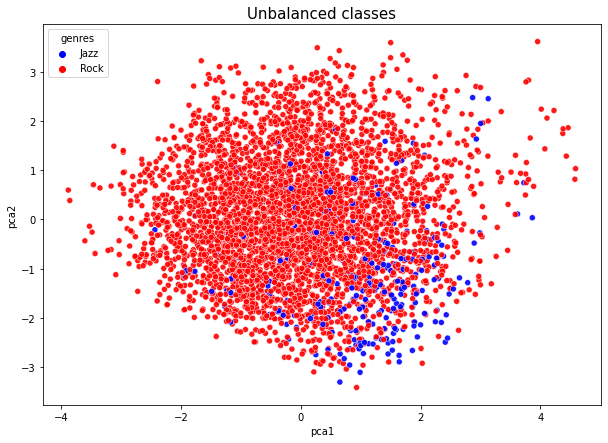

In [18]:
# computing PCA
pca = PCA(2,random_state=10)
pca.fit(scaled_features)
pca_proj = pca.transform(scaled_features)
# dataframe for plotting PCA
df = pd.DataFrame()
df['pca1'] = pca_proj[:,0]
df['pca2'] = pca_proj[:,1]
df['genres'] = labels.apply(lambda x: "Rock" if x==1 else "Jazz")
# plot scatter of PCA
plt.figure(figsize=(10,7))
sns.scatterplot(
    x="pca1", y="pca2",
    hue='genres',
    palette={'Jazz':'blue','Rock':'red'},
    data=df,
    legend="full",
    alpha=0.9
)
plt.title("Unbalanced classes", fontsize= 15)
plt.show()

## c) Imbalanced learning:
#### c.1) Undersampling - Random

In [21]:
under_sample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = under_sample.fit_resample(scaled_features,labels)

In [23]:
print('Legend:\n0: Jazz\n1: Rock')
y_under.value_counts()

Legend:
0: Jazz
1: Rock


0    241
1    241
Name: genre_top, dtype: int64

#### c.2) Condensed Nearest Neighbor (CNN)

#### c.3) Tomek's Link

#### c.4) Oversampling - Random

#### c.5) SMOTE

#### c.6) ADASYN

#### c.7) Class Weight

#### c.8) Ensamble (** not in the program)

_____________________________________________________________________________________________________________________

## d) Decision tree

### d.1) Unbalanced

### d.2) Balanced

### d.3) Compare results

_____________________________________________________________________________________________________________________

## d) KNN

### d.1) Unbalanced

### d.2) Balanced

###d.3) Compare results